In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

/home/harshit/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as k

In [3]:
from keras.datasets import mnist
(x_train,_),(x_test,_)= mnist.load_data()

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [19]:
noise_factor = 0.3
x_train_noise = x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noise = x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [20]:
x_train_noise=np.clip(x_train_noise,0.,1.)
x_test_noise= np.clip(x_test_noise,0.,1.)

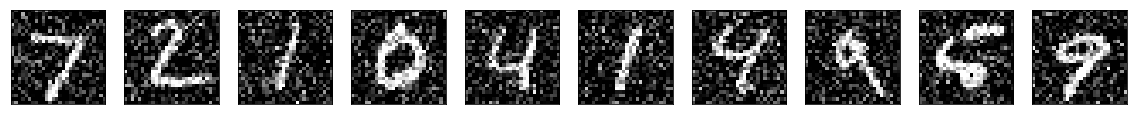

In [21]:
plt.figure(figsize=(20,2))
for i in range(10):
    sub= plt.subplot(1,10,i+1)
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
    
plt.show() 

In [25]:
###noise_factor = 0.7
###x_train_noise = x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
###x_test_noise = x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [26]:
###x_train_noise=np.clip(x_train_noise,0.,1.)
###x_test_noise= np.clip(x_test_noise,0.,1.)

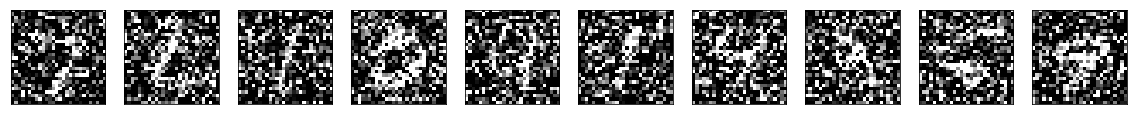

In [27]:
###plt.figure(figsize=(20,2))
###for i in range(10):
###    sub= plt.subplot(1,10,i+1)
###    plt.imshow(x_test_noise[i].reshape(28,28))
###    plt.gray()
###    sub.get_xaxis().set_visible(False)
###    sub.get_yaxis().set_visible(False)
    
###plt.show()    

In [28]:
input_image= Input(shape=(28,28,1))

In [29]:
x= Conv2D(32,(3,3),activation='relu',padding='same')(input_image)
x= MaxPooling2D((2,2),padding='same')(x)
x= Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoder= MaxPooling2D((2,2),padding='same')(x)

In [32]:
x= Conv2D(32,(3,3),activation='relu',padding='same')(encoder)
x= UpSampling2D((2,2))(x)
x= Conv2D(32,(3,3),activation='relu',padding='same')(x)
x= UpSampling2D((2,2))(x)
decoder= Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [33]:
autoencoder = Model(input_image,decoder)

In [34]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train_noise,x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test_noise,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 156s 3ms/step - loss: 0.2333 - val_loss: 0.1653
Epoch 2/50
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1558 - val_loss: 0.1477
Epoch 3/50
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1440 - val_loss: 0.1412
Epoch 4/50
60000/60000 [==============================] - 156s 3ms/step - loss: 0.1383 - val_loss: 0.1361
Epoch 5/50
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1344 - val_loss: 0.1324
Epoch 6/50
60000/60000 [==============================] - 152s 3ms/step - loss: 0.1320 - val_loss: 0.1298
Epoch 7/50
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1301 - val_loss: 0.1283
Epoch 8/50
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1290 - val_loss: 0.1282
Epoch 9/50
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1281 - val_loss: 0.1

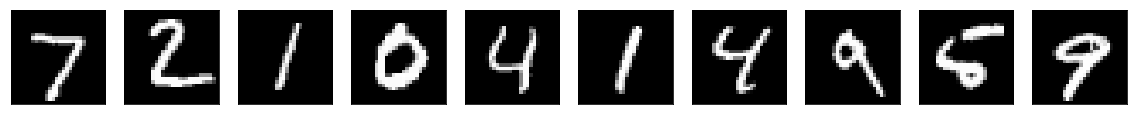

In [36]:
plt.figure(figsize=(20,2))
for i in range(10):
    sub= plt.subplot(1,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
    
plt.show() 